# Project 2
## Data wrangling Project
<p></p>

<li><a href="#gathering data">Gathering data</a></li>
<li><a href="#accessing data">Accessing data</a></li>
<li><a href="#cleaning data">Cleaninig data</a></li>
<li><a href="#storing data">Storing data</a></li>
<li><a href="#analysing data">Analysing data</a></li>

<a id="gathering data"></a>
## Gathering data

In [173]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt 
import seaborn as sns 
import tweepy
import bs4
import json
from timeit import default_timer as timer
%matplotlib inline

### Gathering the Data by download

Reading twitter_archive_enhanced.csv to a dataframe

In [2]:
twitter_archive_df = pd.read_csv("twitter-archive-enhanced.csv")

In [3]:
# printing part of the dataframe to view
twitter_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
twitter_archive_df.shape

(2356, 17)

### Gathering data from url download

Downloading the file image_predictions.tsv from the Udacity servers and loading into a dataframe

In [5]:
# url for where to download the image_predictions.tsv 
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

response = requests.get(url)


# writing the contents to a tsv file
with open("image-predictions.tsv", "wb") as file:
    file.write(response.content)

Reading the tsv file into a dataframe, specifying the delimiter to be tab("\t")

In [6]:
image_df = pd.read_csv("image-predictions.tsv",delimiter="\t")
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
image_df.shape

(2075, 12)

### Gathering Data using Twitter API 

This section will explore the use of the twitter api to obtain the following information using the twitter id provided in the image-prediction.tsv file downloaded
<ol>
<li>retweet count</li>
<li>reply count</li>
<li>like count</li>
<li>quote count</li>
    </ol>

In [9]:
auth = tweepy.OAuth1UserHandler(api_key,api_secret,access_token,access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [10]:
search_id = twitter_archive_df["tweet_id"].values

In [11]:
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in search_id:
        count += 1
        #print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            #print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepyException as e:
            #print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

Rate limit reached. Sleeping for: 202
Rate limit reached. Sleeping for: 324


2038.3441548
{888202515573088257: NotFound('404 Not Found\n144 - No status found with that ID.'), 873697596434513921: NotFound('404 Not Found\n144 - No status found with that ID.'), 872668790621863937: NotFound('404 Not Found\n144 - No status found with that ID.'), 872261713294495745: NotFound('404 Not Found\n144 - No status found with that ID.'), 869988702071779329: NotFound('404 Not Found\n144 - No status found with that ID.'), 866816280283807744: NotFound('404 Not Found\n144 - No status found with that ID.'), 861769973181624320: NotFound('404 Not Found\n144 - No status found with that ID.'), 856602993587888130: NotFound('404 Not Found\n144 - No status found with that ID.'), 856330835276025856: NotFound('404 Not Found\n144 - No status found with that ID.'), 851953902622658560: NotFound('404 Not Found\n144 - No status found with that ID.'), 851861385021730816: NotFound('404 Not Found\n144 - No status found with that ID.'), 845459076796616705: NotFound('404 Not Found\n144 - No status f

In [16]:
len(fails_dict)

29

reading tweet_json.txt in a pandas dataframe twitter_api_df

In [18]:
twitter_api_df = pd.read_json("tweet_json.txt", lines=True)

In [19]:
#viewing top 5 rows of the dataframe
twitter_api_df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


<a id="accessing data"></a>

## Accesing the Data

Using pandas function head,tail and sample to visually view the twitter_archive_df dataset

In [20]:
twitter_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [21]:
twitter_archive_df.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [22]:
twitter_archive_df.sample(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1871,675147105808306176,NaN,NaN,2015-12-11 02:56:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're presenting a group project and the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675147105...,10,10,None,None,None,None,None
1605,685681090388975616,6.855479e+17,4.196984e+09,2016-01-09 04:34:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Jack deserves another round of applause. If yo...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
1383,700847567345688576,NaN,NaN,2016-02-20 01:00:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Crouton. He's a Galapagos Boonwiddle. Has...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700847567...,10,10,Crouton,None,None,None,None
1029,745712589599014916,NaN,NaN,2016-06-22 20:18:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Percy. He fell asleep at the wheel. Ir...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/745712589...,7,10,Percy,None,None,None,None
1844,675849018447167488,6.758457e+17,4.196984e+09,2015-12-13 01:25:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This dog is being demoted to a 9/10 for not we...,NaN,NaN,NaN,NaN,9,10,None,None,None,None,None
1248,711363825979756544,NaN,NaN,2016-03-20 01:28:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Please, no puparazzi"" 11/10 https://t.co/nJIX...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/711363825...,11,10,None,None,None,None,None
681,788765914992902144,NaN,NaN,2016-10-19 15:37:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Butter. She can have whatever she want...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/788765914...,12,10,Butter,None,None,None,None
946,752568224206688256,NaN,NaN,2016-07-11 18:20:21 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here are three doggos completely misjudging an...,NaN,NaN,NaN,https://vine.co/v/5W0bdhEUUVT,9,10,None,None,None,None,None
2091,670783437142401025,NaN,NaN,2015-11-29 01:56:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Flamboyant pup here. Probably poisonous. Won't...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670783437...,1,10,None,None,None,None,None
1976,672995267319328768,NaN,NaN,2015-12-05 04:25:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pumpkin. He can look in two different ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672995267...,8,10,Pumpkin,None,None,None,None


In [23]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [47]:
twitter_archive_df[twitter_archive_df["retweeted_status_id"].isnull()==False]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [24]:
twitter_archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


looking at rows with numerator less than 10

In [37]:
twitter_archive_df[twitter_archive_df["rating_numerator"]<10].shape

(440, 17)

440 rows where the numerator is less than 10

In [25]:
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [26]:
image_df.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [27]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [29]:
image_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [30]:
image_df.sample(50)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1627,804413760345620481,https://pbs.twimg.com/media/CuRDF-XWcAIZSer.jpg,1,chow,0.090341,True,binoculars,0.083499,False,Irish_setter,0.077456,True
1048,713411074226274305,https://pbs.twimg.com/media/CeaLlAPUMAIcC7U.jpg,1,Great_Pyrenees,0.720337,True,Samoyed,0.129542,True,kuvasz,0.122451,True
645,681610798867845120,https://pbs.twimg.com/media/CXWRZBgWkAEHMea.jpg,1,toy_poodle,0.821704,True,miniature_poodle,0.116042,True,Yorkshire_terrier,0.014847,True
827,693486665285931008,https://pbs.twimg.com/ext_tw_video_thumb/69348...,1,sea_lion,0.519811,False,Siamese_cat,0.290971,False,black-footed_ferret,0.039967,False
1417,771171053431250945,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True
1107,723673163800948736,https://pbs.twimg.com/media/CgsA5eFWgAAu0qn.jpg,1,golden_retriever,0.839390,True,Labrador_retriever,0.065706,True,hand_blower,0.012941,False
62,667160273090932737,https://pbs.twimg.com/media/CUI6uuaW4AAvCIs.jpg,1,golden_retriever,0.471351,True,miniature_poodle,0.091992,True,standard_poodle,0.087385,True
1935,859924526012018688,https://pbs.twimg.com/media/C-8QypZXcAAekaF.jpg,1,French_bulldog,0.254587,True,Staffordshire_bullterrier,0.192558,True,hog,0.100270,False
1318,755955933503782912,https://pbs.twimg.com/ext_tw_video_thumb/75595...,1,Pekinese,0.596882,True,Maltese_dog,0.176478,True,Great_Pyrenees,0.026775,True
1177,737800304142471168,https://pbs.twimg.com/media/Cj0xdMBVAAEbDHp.jpg,1,malamute,0.374682,True,Norwegian_elkhound,0.334853,True,limousine,0.068173,False


In [31]:
twitter_api_df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


In [32]:
twitter_api_df.tail()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
2322,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2323,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2324,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2325,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2326,2015-11-15 22:32:08+00:00,666020888022790149,666020888022790144,Here we have a Japanese Irish Setter. Lost eye...,False,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666020881337073664, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


In [33]:
twitter_api_df.sample(50)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
1383,2016-02-14 21:55:47+00:00,698989035503689728,698989035503689728,This is Oliver. He does toe touches in his sle...,False,"[0, 91]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 698989023348576256, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1107,2016-05-06 02:24:02+00:00,728409960103686147,728409960103686144,This is Wallace. He's a skater pup. He said se...,False,"[0, 115]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 728409944555401216, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1147,2016-04-13 00:17:25+00:00,720043174954147842,720043174954147840,This is Neptune. He's a Snowy Swiss Mountain F...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 720043168729862144, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1811,2015-12-13 04:02:03+00:00,675888385639251968,675888385639251968,Breathtaking scene. A father taking care of hi...,False,"[0, 134]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 675888381008683009, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1596,2016-01-06 23:33:58+00:00,684880619965411328,684880619965411328,Here we have a basking dino pupper. Looks powe...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 684880611673292800, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
470,2016-12-28 03:08:11+00:00,813944609378369540,813944609378369536,RT @dog_rates: This is Bruce. He never backs d...,False,"[0, 116]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 790277108719386624, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,{'created_at': 'Sun Oct 23 19:42:02 +0000 2016...,NaN,NaN,NaN,NaN
781,2016-09-03 19:23:13+00:00,772152991789019136,772152991789019136,Here's a couple rufferees making sure all the ...,False,"[0, 116]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 772152984096632836, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
835,2016-08-10 00:16:21+00:00,763167063695355904,763167063695355904,RT @dog_rates: Meet Eve. She's a raging alcoho...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,NaN,NaN,en,{'created_at': 'Sun Dec 06 00:17:55 +0000 2015...,NaN,NaN,NaN,NaN
1155,2016-04-09 23:10:47+00:00,718939241951195136,718939241951195136,This is Otis. Everybody look at Otis. 12/10 wo...,False,"[0, 102]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 718939234342674432, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1788,2015-12-15 03:23:14+00:00,676603393314578432,676603393314578432,This is Godzilla pupper. He had a ruff childho...,False,"[0, 144]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 676603389325672448, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


In [34]:
twitter_api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2327 non-null   datetime64[ns, UTC]
 1   id                             2327 non-null   int64              
 2   id_str                         2327 non-null   int64              
 3   full_text                      2327 non-null   object             
 4   truncated                      2327 non-null   bool               
 5   display_text_range             2327 non-null   object             
 6   entities                       2327 non-null   object             
 7   extended_entities              2057 non-null   object             
 8   source                         2327 non-null   object             
 9   in_reply_to_status_id          77 non-null     float64            
 10  in_reply_to_status_id_st

In [38]:
twitter_api_df.shape

(2327, 32)

In [35]:
twitter_api_df.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.327000e+03,2.327000e+03,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,0.0,0.0,0.0,2327.000000,2327.000000,2195.0,2195.0,2.600000e+01,2.600000e+01
mean,7.417930e+17,7.417930e+17,7.440692e+17,7.440692e+17,2.040329e+16,2.040329e+16,NaN,NaN,NaN,2458.990546,7027.848732,0.0,0.0,8.113972e+17,8.113972e+17
std,6.820795e+16,6.820795e+16,7.524295e+16,7.524295e+16,1.260797e+17,1.260797e+17,NaN,NaN,NaN,4164.301082,10921.356968,0.0,0.0,6.295843e+16,6.295843e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,1.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.781394e+17,6.781394e+17,6.757073e+17,6.757073e+17,3.589728e+08,3.589728e+08,NaN,NaN,NaN,492.500000,1221.000000,0.0,0.0,7.761338e+17,7.761338e+17
50%,7.178418e+17,7.178418e+17,7.032559e+17,7.032559e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1144.000000,3038.000000,0.0,0.0,8.281173e+17,8.281173e+17
75%,7.986547e+17,7.986547e+17,8.233264e+17,8.233264e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,2845.000000,8565.500000,0.0,0.0,8.637581e+17,8.637581e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,70341.000000,144273.000000,0.0,0.0,8.860534e+17,8.860534e+17


In [52]:
twitter_api_df["created_at"].max()

Timestamp('2017-08-01 16:23:56+0000', tz='UTC')

checking for duplicates

In [44]:
twitter_archive_df.duplicated().sum()

0

In [40]:
image_df.duplicated().sum()

0

no duplicates found in datasets

Observations

1. From twitter_archive_df, several columns have missing values
2. some rows especially at the bottom have ratings less the 10 which should not be as from context the ratings should be higher than 10
3. serveral columns such as name,doggo,floofer,pupper,puppo, in_reply_to_status_id should be dropped
4. timestamp column does not have the datetime type
5. missing/null values found in columns in twitter_api_df
6. drop the columns not needed in twitter_api_df
7. use retweeted_status_id to remove rows which are retweets 
8. max rating with numerator as 1776 and denominator as 170 which indicates there are outliers
9. twitter_api_df and twitter_archive_df should be combined into one dataset to hold the tweet ids and the information about them
10. remove rows beyond August 1st 2018 from twitter_api_df

<a id="cleaning data"></a>

## Cleaning the Data

Making copies of the datasets

In [156]:
twitter_archive_clean = twitter_archive_df.copy()
image_df_clean = image_df.copy()
twitter_api_clean = twitter_api_df.copy()

#### Define

Removing unnecessary columns within the twitter archive dataset by selecting only the columns that are needed

In [85]:
# looking at the names of the columns to select
twitter_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [86]:
# code to select the required columns
twitter_archive_clean = twitter_archive_clean[["tweet_id","timestamp","rating_numerator","rating_denominator","retweeted_status_id"]]

In [87]:
# check to ensure that the code worked as expected
twitter_archive_clean.head()

,tweet_id,timestamp,rating_numerator,rating_denominator,retweeted_status_id
0,892420643555336193,2017-08-01 16:23:56 +0000,13,10,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,13,10,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,12,10,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,13,10,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,12,10,NaN


#### Define

Changing the datatype of the timestamp column from object to datetime

In [88]:
# code to convert column to dattime

twitter_archive_clean["timestamp"] = pd.to_datetime(twitter_archive_clean["timestamp"])

In [89]:
#checking column datatypes

twitter_archive_clean.dtypes

tweet_id                             int64
timestamp              datetime64[ns, UTC]
rating_numerator                     int64
rating_denominator                   int64
retweeted_status_id                float64
dtype: object

#### Define

Using the retweeted_status_id column, remove all rows which are actually retweets and then drop the retweeted_status_id column

In [ ]:
# obtain the index for the non-null values in retweeted_status_id column
retweet = twitter_archive_clean[twitter_archive_clean["retweeted_status_id"].isnull()==False]["tweet_id"].index

In [91]:
len(retweet)

181

In [92]:
retweet

Int64Index([  19,   32,   36,   68,   73,   74,   78,   91,   95,   97,
            ...
             926,  937,  943,  949, 1012, 1023, 1043, 1242, 2259, 2260],
           dtype='int64', length=181)

In [93]:
# using the drop method alongside the index, dropped all the rows that are retweets
twitter_archive_clean.drop(retweet,axis=0,inplace=True)

In [95]:
#reset the index of the dataset
twitter_archive_clean.reset_index(inplace=True)

In [96]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   index                2175 non-null   int64              
 1   tweet_id             2175 non-null   int64              
 2   timestamp            2175 non-null   datetime64[ns, UTC]
 3   rating_numerator     2175 non-null   int64              
 4   rating_denominator   2175 non-null   int64              
 5   retweeted_status_id  0 non-null      float64            
dtypes: datetime64[ns, UTC](1), float64(1), int64(4)
memory usage: 102.1 KB


In [99]:
twitter_archive_clean

,index,tweet_id,timestamp,rating_numerator,rating_denominator,retweeted_status_id
0,0,892420643555336193,2017-08-01 16:23:56+00:00,13,10,NaN
1,1,892177421306343426,2017-08-01 00:17:27+00:00,13,10,NaN
2,2,891815181378084864,2017-07-31 00:18:03+00:00,12,10,NaN
3,3,891689557279858688,2017-07-30 15:58:51+00:00,13,10,NaN
4,4,891327558926688256,2017-07-29 16:00:24+00:00,12,10,NaN
...,...,...,...,...,...,...
2170,2351,666049248165822465,2015-11-16 00:24:50+00:00,5,10,NaN
2171,2352,666044226329800704,2015-11-16 00:04:52+00:00,6,10,NaN
2172,2353,666033412701032449,2015-11-15 23:21:54+00:00,9,10,NaN
2173,2354,666029285002620928,2015-11-15 23:05:30+00:00,7,10,NaN


In [100]:
# proceeding to drop index and retweeted_status_id columns as they are not needed anymore

twitter_archive_clean.drop(["index","retweeted_status_id"],axis=1,inplace=True)

In [101]:
twitter_archive_clean

,tweet_id,timestamp,rating_numerator,rating_denominator
0,892420643555336193,2017-08-01 16:23:56+00:00,13,10
1,892177421306343426,2017-08-01 00:17:27+00:00,13,10
2,891815181378084864,2017-07-31 00:18:03+00:00,12,10
3,891689557279858688,2017-07-30 15:58:51+00:00,13,10
4,891327558926688256,2017-07-29 16:00:24+00:00,12,10
...,...,...,...,...
2170,666049248165822465,2015-11-16 00:24:50+00:00,5,10
2171,666044226329800704,2015-11-16 00:04:52+00:00,6,10
2172,666033412701032449,2015-11-15 23:21:54+00:00,9,10
2173,666029285002620928,2015-11-15 23:05:30+00:00,7,10


#### Define

Removing unnecessary columns within the twitter api dataset by selecting only the columns that are needed

In [102]:
twitter_api_clean.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink',
       'quoted_status'],
      dtype='object')

In [104]:
# code to select the required columns
twitter_api_clean = twitter_api_clean[["created_at","id","retweet_count","favorite_count"]]

In [105]:
# checking that new datafram contains the columns we want
twitter_api_clean.head()

,created_at,id,retweet_count,favorite_count
0,2017-08-01 16:23:56+00:00,892420643555336193,6970,33697
1,2017-08-01 00:17:27+00:00,892177421306343426,5272,29228
2,2017-07-31 00:18:03+00:00,891815181378084864,3464,21976
3,2017-07-30 15:58:51+00:00,891689557279858688,7191,36795
4,2017-07-29 16:00:24+00:00,891327558926688256,7718,35185


In [106]:
# check to see if there are any null values 
twitter_api_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   created_at      2327 non-null   datetime64[ns, UTC]
 1   id              2327 non-null   int64              
 2   retweet_count   2327 non-null   int64              
 3   favorite_count  2327 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(3)
memory usage: 72.8 KB


#### Define

Merging the twitter archive dataframe and the twitter api dataframe into one using their id

In [107]:
#code to merge the two dataframes
twitter_df = pd.merge(twitter_archive_clean,twitter_api_clean,left_on="tweet_id",right_on="id")

In [125]:
twitter_original = pd.merge(twitter_archive_clean,twitter_api_clean,left_on="tweet_id",right_on="id")

In [108]:
#pritning out first set of rows to confirm that code was successful
twitter_df.head()

,tweet_id,timestamp,rating_numerator,rating_denominator,created_at,id,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,13,10,2017-08-01 16:23:56+00:00,892420643555336193,6970,33697
1,892177421306343426,2017-08-01 00:17:27+00:00,13,10,2017-08-01 00:17:27+00:00,892177421306343426,5272,29228
2,891815181378084864,2017-07-31 00:18:03+00:00,12,10,2017-07-31 00:18:03+00:00,891815181378084864,3464,21976
3,891689557279858688,2017-07-30 15:58:51+00:00,13,10,2017-07-30 15:58:51+00:00,891689557279858688,7191,36795
4,891327558926688256,2017-07-29 16:00:24+00:00,12,10,2017-07-29 16:00:24+00:00,891327558926688256,7718,35185


#### Define

In new dataset twitter_df drop columns id and created_at

In [109]:
#code to drop columns

twitter_df.drop(["created_at","id"],axis=1,inplace=True)

In [110]:
# checking that code was successful

twitter_df.head()

,tweet_id,timestamp,rating_numerator,rating_denominator,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,13,10,6970,33697
1,892177421306343426,2017-08-01 00:17:27+00:00,13,10,5272,29228
2,891815181378084864,2017-07-31 00:18:03+00:00,12,10,3464,21976
3,891689557279858688,2017-07-30 15:58:51+00:00,13,10,7191,36795
4,891327558926688256,2017-07-29 16:00:24+00:00,12,10,7718,35185


Performing basic checks on new merged dataset

In [111]:
# checking for null values
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2167 entries, 0 to 2166
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2167 non-null   int64              
 1   timestamp           2167 non-null   datetime64[ns, UTC]
 2   rating_numerator    2167 non-null   int64              
 3   rating_denominator  2167 non-null   int64              
 4   retweet_count       2167 non-null   int64              
 5   favorite_count      2167 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(5)
memory usage: 118.5 KB


No null values found

In [112]:
# check for duplicates
twitter_df.duplicated().sum()

0

No duplicates in dataset

In [113]:
# perform describe method

twitter_df.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count
count,2.167000e+03,2167.000000,2167.000000,2167.000000,2167.000000
mean,7.369083e+17,13.219659,10.494693,2225.330411,7546.748500
std,6.742548e+16,47.813636,7.031971,3963.958072,11143.114991
min,6.660209e+17,0.000000,0.000000,1.000000,45.000000
25%,6.768157e+17,10.000000,10.000000,476.000000,1595.500000
50%,7.095192e+17,11.000000,10.000000,1054.000000,3395.000000
75%,7.892032e+17,12.000000,10.000000,2534.000000,9357.000000
max,8.924206e+17,1776.000000,170.000000,70341.000000,144273.000000


<AxesSubplot:>

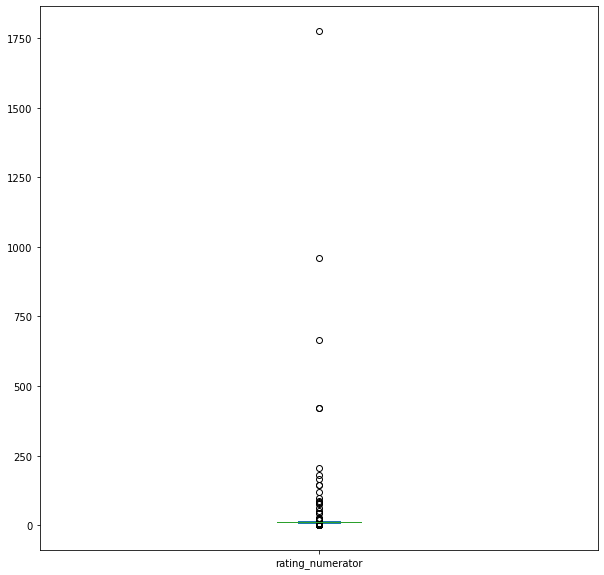

In [117]:
# using boxplot to check for anomalies
twitter_df["rating_numerator"].plot.box(figsize=(10,10))

Box plot of rating numerator shows a lot of anomalies which can be expected as from the describe function we can see that the max is 1776 and the minimum is 0 which is different from the information obtained that the rating are 10 and above because they are good dogs. Hence we should not have ratings lower than 10 

<AxesSubplot:>

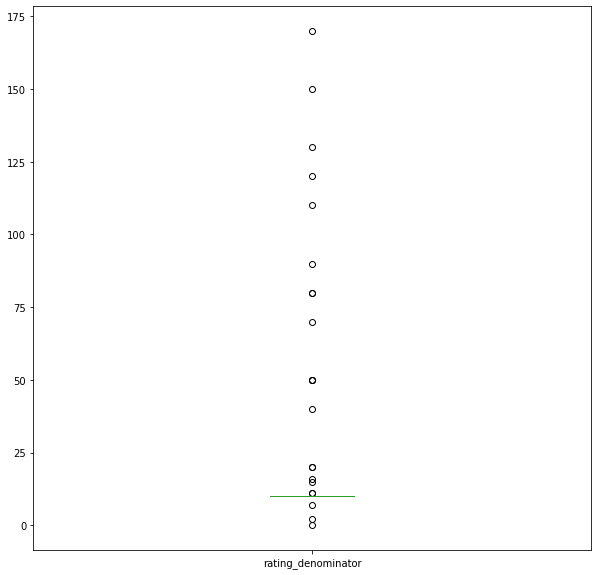

In [118]:
# using boxplot to check for anomalies
twitter_df["rating_denominator"].plot.box(figsize=(10,10))

the denominator should always be 10 but here we can see that there are other various values which are not 10 and need to be removed

#### Define

find and remove rows with denominator greater than 10

In [119]:
#find the rows with denominator greater than 10
twitter_df[twitter_df["rating_denominator"]>10]

,tweet_id,timestamp,rating_numerator,rating_denominator,retweet_count,favorite_count
284,832088576586297345,2017-02-16 04:45:50+00:00,11,15,2,59
359,820690176645140481,2017-01-15 17:52:40+00:00,84,70,2990,11557
727,758467244762497024,2016-07-28 01:00:57+00:00,165,150,2025,4459
883,740373189193256964,2016-06-08 02:41:38+00:00,9,11,12089,32476
935,731156023742988288,2016-05-13 16:15:54+00:00,204,170,1140,3542
980,722974582966214656,2016-04-21 02:25:47+00:00,4,20,1429,3761
1017,716439118184652801,2016-04-03 01:36:11+00:00,50,50,189,2190
1043,713900603437621249,2016-03-27 01:29:02+00:00,99,90,660,2612
1068,710658690886586372,2016-03-18 02:46:49+00:00,80,80,512,2135
1088,709198395643068416,2016-03-14 02:04:08+00:00,45,50,589,2262


In [121]:
#save the index of the rows to a list
drop_list = twitter_df[twitter_df["rating_denominator"]>10].index

In [122]:
# drop rows using the index list
twitter_df.drop(drop_list,axis=0,inplace=True)

In [123]:
# check that those rows have been removed
twitter_df[twitter_df["rating_denominator"]>10]

,tweet_id,timestamp,rating_numerator,rating_denominator,retweet_count,favorite_count


In [124]:
# check dataframe with describe methosd again
twitter_df.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count
count,2.148000e+03,2148.000000,2148.000000,2148.000000,2148.000000
mean,7.370805e+17,12.693203,9.990223,2225.349628,7558.976723
std,6.757481e+16,47.371520,0.283693,3964.144075,11155.755790
min,6.660209e+17,0.000000,0.000000,1.000000,45.000000
25%,6.766121e+17,10.000000,10.000000,476.000000,1585.500000
50%,7.095381e+17,11.000000,10.000000,1054.500000,3406.000000
75%,7.895480e+17,12.000000,10.000000,2546.750000,9404.000000
max,8.924206e+17,1776.000000,10.000000,70341.000000,144273.000000


#### Define

Remove rows with numerator less than 10

In [127]:
# viewing the number of rows where the numerator is less than 10 as that is not expected 
len(twitter_df[twitter_df["rating_numerator"]<10])

427

In [128]:
# viewing the number of rows where the numerator is greater than 20
len(twitter_df[twitter_df["rating_numerator"]>20])

10

In [131]:
# viewing the rows where the numerator is greater than 20
twitter_df[twitter_df["rating_numerator"]>20]

,tweet_id,timestamp,rating_numerator,rating_denominator,retweet_count,favorite_count
161,855862651834028034,2017-04-22 19:15:32+00:00,420,10,21,302
162,855860136149123072,2017-04-22 19:05:32+00:00,666,10,849,4397
244,838150277551247360,2017-03-04 22:12:52+00:00,182,10,301,1567
260,835246439529840640,2017-02-24 21:54:03+00:00,960,0,63,1988
425,810984652412424192,2016-12-19 23:06:23+00:00,24,7,1325,5038
554,786709082849828864,2016-10-13 23:23:56+00:00,75,10,5706,17321
612,778027034220126208,2016-09-20 00:24:34+00:00,27,10,1490,6176
797,749981277374128128,2016-07-04 15:00:45+00:00,1776,10,2270,4768
1526,680494726643068929,2015-12-25 21:06:00+00:00,26,10,438,1571
1887,670842764863651840,2015-11-29 05:52:33+00:00,420,10,7557,22016


From the information above we can see that there is a 427 rows with numerator higher than and 10 with rows greater than 20. On further review, we see that the rating_denominator for some rows is less than 10 which is an error

In [132]:
# viewing the row where the denominator is less than 10
twitter_df[twitter_df["rating_denominator"]<10]

,tweet_id,timestamp,rating_numerator,rating_denominator,retweet_count,favorite_count
260,835246439529840640,2017-02-24 21:54:03+00:00,960,0,63,1988
425,810984652412424192,2016-12-19 23:06:23+00:00,24,7,1325,5038
2146,666287406224695296,2015-11-16 16:11:11+00:00,1,2,55,123


Decided that for the project, the max numerator rating will be 20 so it aligns with been 10 since the ratings are said to be 10 and above and we can assume that rating lower than 10 to signify bad dogs

In [138]:
# get the indexes of both instances where the numerator is less than 10 and greater than 2o
drop_list = twitter_df[twitter_df["rating_numerator"]<10].index
#drop_list.append(twitter_df[twitter_df["rating_numerator"]>20].index)

Int64Index([  42,  196,  262,  322,  586,  613,  654,  669,  678,  691,
            ...
             161,  162,  244,  260,  425,  554,  612,  797, 1526, 1887],
           dtype='int64', length=437)

In [139]:
# drop rows using the index list
twitter_df.drop(drop_list,axis=0,inplace=True)

In [144]:
# get the indexes of both instances where the denominator is less than 10
drop_list = twitter_df[twitter_df["rating_numerator"]>20].index

# drop rows using the index list
twitter_df.drop(drop_list,axis=0,inplace=True)

In [140]:
# get the indexes of both instances where the denominator is less than 10
drop_list = twitter_df[twitter_df["rating_denominator"]<10].index

# drop rows using the index list
twitter_df.drop(drop_list,axis=0,inplace=True)

In [147]:
# used the describe method to check
twitter_df.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count
count,1.711000e+03,1711.000000,1711.0,1711.000000,1711.000000
mean,7.490913e+17,11.469316,10.0,2590.579778,8877.383986
std,6.878497e+16,1.137387,0.0,4340.579662,12042.091518
min,6.660508e+17,10.000000,10.0,1.000000,45.000000
25%,6.843509e+17,10.000000,10.0,581.000000,2053.500000
50%,7.373107e+17,11.000000,10.0,1375.000000,4596.000000
75%,8.080539e+17,12.000000,10.0,2985.500000,11344.000000
max,8.924206e+17,17.000000,10.0,70341.000000,144273.000000


In [145]:
len(twitter_df[twitter_df["rating_numerator"]<10])

0

In [146]:
len(twitter_df[twitter_df["rating_numerator"]>20])

0

#### Define

For better analysis, columns regarding the month and year will be created using thr timestamp column

In [152]:
# creating the month column
twitter_df["month"] = twitter_df["timestamp"].dt.month

#creating thr year column
twitter_df["year"] = twitter_df["timestamp"].dt.year

In [153]:
# check that columns were created successfully 
twitter_df.head()

,tweet_id,timestamp,rating_numerator,rating_denominator,retweet_count,favorite_count,month,year
0,892420643555336193,2017-08-01 16:23:56+00:00,13,10,6970,33697,8,2017
1,892177421306343426,2017-08-01 00:17:27+00:00,13,10,5272,29228,8,2017
2,891815181378084864,2017-07-31 00:18:03+00:00,12,10,3464,21976,7,2017
3,891689557279858688,2017-07-30 15:58:51+00:00,13,10,7191,36795,7,2017
4,891327558926688256,2017-07-29 16:00:24+00:00,12,10,7718,35185,7,2017


<a id = "storing data"></a>

## Storing Data

The new dataset twitter_df will now be stored as a csv using pandas

In [166]:
twitter_df.to_csv("twitter_archive_master.csv")

<a id = "analysing data"></a>

## Analysing Data

In [167]:
# running describe method on twitter dataset again
twitter_df.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,month,year
count,1.711000e+03,1711.000000,1711.0,1711.000000,1711.000000,1711.000000,1711.000000
mean,7.490913e+17,11.469316,10.0,2590.579778,8877.383986,6.683226,2015.986558
std,6.878497e+16,1.137387,0.0,4340.579662,12042.091518,4.015635,0.680854
min,6.660508e+17,10.000000,10.0,1.000000,45.000000,1.000000,2015.000000
25%,6.843509e+17,10.000000,10.0,581.000000,2053.500000,3.000000,2016.000000
50%,7.373107e+17,11.000000,10.0,1375.000000,4596.000000,6.000000,2016.000000
75%,8.080539e+17,12.000000,10.0,2985.500000,11344.000000,11.000000,2016.000000
max,8.924206e+17,17.000000,10.0,70341.000000,144273.000000,12.000000,2017.000000


from this we can quickly see that on average dogs were rated at 11 with the minimum been 10 and the maximum been 17

### Monthly review

In [170]:
# group by month and view retweet count average

twitter_df.groupby("month")["retweet_count"].mean()

month
1     2469.624413
2     2159.930818
3     2206.363636
4     2738.204082
5     3843.319588
6     4282.564516
7     3583.785185
8     2969.322034
9     2916.876923
10    3675.708333
11    1295.274775
12    2072.811258
Name: retweet_count, dtype: float64

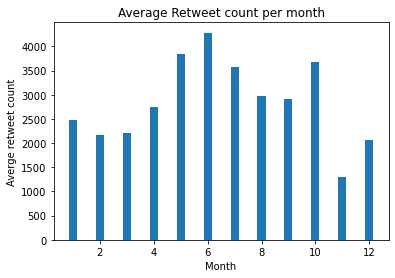

In [174]:
x = [x for x in range(1,13)]
y = twitter_df.groupby("month")["retweet_count"].mean().values


plt.bar(x,y,width=0.3)
plt.xlabel("Month")
plt.ylabel("Averge retweet count")
plt.title("Average Retweet count per month")
plt.show()

From this visualisation we can see that the most retweets on average was done in the 6th month which is June

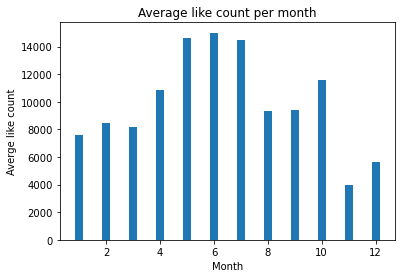

In [175]:
# group by month and view like count average
x = [x for x in range(1,13)]
y = twitter_df.groupby("month")["favorite_count"].mean().values

plt.bar(x,y,width=0.3)
plt.xlabel("Month")
plt.ylabel("Averge like count")
plt.title("Average like count per month")
plt.show()

From this visualisation we can see that just with the average retweet count, the most likes on average came in the 6th month which is June

### Ratings

Looking at the rating, did the higher ratings have more retweets and like? is there a correlation

In [192]:
twitter_df.groupby("rating_numerator")[["retweet_count","favorite_count"]].mean()

,retweet_count,favorite_count
rating_numerator,,
10,1178.318182,3427.818182
11,1778.948235,5819.416471
12,2485.433735,9312.732932
13,5354.729373,18421.798680
14,6923.976744,22974.883721
15,1.000000,133.000000
17,8.000000,113.000000


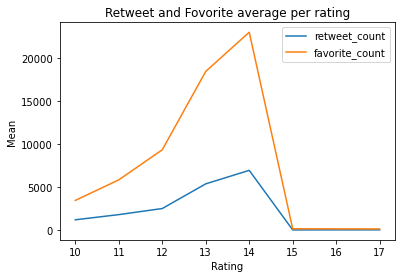

In [198]:
twitter_df.groupby("rating_numerator")[["retweet_count","favorite_count"]].mean().plot(kind="line")
plt.ylabel("Mean")
plt.xlabel("Rating")
plt.title("Retweet and Fovorite average per rating")
plt.show()

From this initial check we can see that there is an increase in retweet count and favorite count with an increase in the rating. However, when the rating gets to 15 there is a massive drop. Could there be a reason for this drop?

In [196]:
twitter_df.groupby("rating_numerator")[["retweet_count","favorite_count"]].count()

,retweet_count,favorite_count
rating_numerator,,
10,440,440
11,425,425
12,498,498
13,303,303
14,43,43
15,1,1
17,1,1


By looking at the count of rows for each of the numerator/rating we can see that we only have 1 for 15 and 17. This surely affects the analysis and thus we can ignore those values and consider them anomalies

### Yearly review

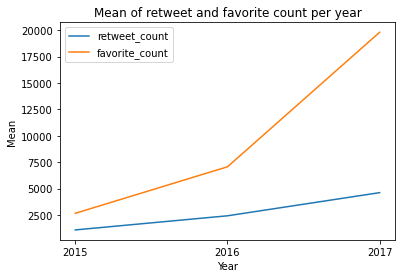

In [212]:
# group the dataset by year, review the retweet_count and favorite_count through a line chart
y = twitter_df.groupby("year")[["retweet_count","favorite_count"]].mean().plot(kind="line")
x = [2015,2016,2017]
plt.xticks(x)
plt.xlabel("Year")
plt.ylabel("Mean")
plt.title("Mean of retweet and favorite count per year")
plt.show()

From this we can see that there is also an increase in both the retweet and favorite count on average from year to year

<AxesSubplot:xlabel='year,month'>

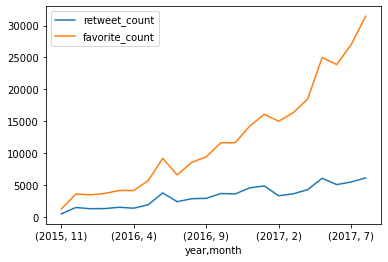

In [215]:
twitter_df.groupby(["year","month"])[["retweet_count","favorite_count"]].mean().plot(kind="line")